<a href="https://colab.research.google.com/github/AiswaryaKatta/Computer-networks-lab/blob/main/crop_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas scikit-learn tensorflow

In [ ]:
import pandas as pd

# Load Crop Recommendation dataset
crop_recommendation_data = pd.read_csv('Crop_recommendation.csv')
print("Crop Recommendation Dataset:")
print(crop_recommendation_data.head())


Crop Recommendation Dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
# Load Crop Yield Prediction dataset
crop_yield_data = pd.read_csv('_crop+yield+prediction_data_crop_yield.csv')
print("Crop Yield Prediction Dataset:")
print(crop_yield_data.head())


Crop Yield Prediction Dataset:
           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                                 17.61                              84.12   

   Temperature at 2 Meters (C)  Yield  
0                        26.01  11560  
1                        26.11  11253  
2                        26.24   9456  
3                        25.56   9321  
4                        25.7

In [ ]:
# Load Crop Yield dataset
crop_yield_csv_data = pd.read_csv('crop_yield.csv')
print("Crop Yield Dataset:")
print(crop_yield_csv_data.head())


Crop Yield Dataset:
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


In [ ]:
!pip install chardet


In [ ]:
import chardet

with open('data (1).csv', 'rb') as f:
    result = chardet.detect(f.read(10000))  # Read first 10,000 bytes
print(result)

{'encoding': None, 'confidence': 0.0, 'language': None}


In [ ]:
data_csv = pd.read_excel('data (1).csv')
print(data_csv.head())


    Moisture  rainfall  Average Humidity  Mean Temp  max Temp  Min temp  \
0  12.801685  0.012360                57         62        71        52   
1  12.851654  0.004172                57         58        73        43   
2  12.776773  0.000000                56         58        69        46   
3  12.942001  0.031747                62         56        70        43   
4  12.984652  0.000000                65         56        70        42   

   alkaline  sandy  chalky  clay  millet yield  Outcomes  
0         0      1       0     0             2         1  
1         0      1       0     0             0         1  
2         0      0       1     0             4         0  
3         0      1       0     0             0         1  
4         0      0       0     1             1         0  


In [ ]:
print(data_csv.columns)


Index(['Moisture', 'rainfall', 'Average Humidity', 'Mean Temp', 'max Temp',
       'Min temp', 'alkaline', 'sandy', 'chalky', 'clay', 'millet yield',
       'Outcomes'],
      dtype='object')


In [ ]:
print(data_csv.isnull().sum())


Moisture            0
rainfall            0
Average Humidity    0
Mean Temp           0
max Temp            0
Min temp            0
alkaline            0
sandy               0
chalky              0
clay                0
millet yield        0
Outcomes            0
dtype: int64


In [ ]:
# Define features (X) and target (y)
X = data_csv.drop('Outcomes', axis=1)  # Drop target column
y = data_csv['Outcomes']  # Target column


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 1.0


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.6208333333333333


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gbm_pred))


Gradient Boosting Accuracy: 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Accuracy: 0.6375


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout

# Reshape for CNN
X_train_cnn = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(-1, X_test.shape[1], 1)

# Build CNN Model
cnn = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(y.unique()), activation='softmax')  # Replace with sigmoid if binary classification
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)
cnn_loss, cnn_acc = cnn.evaluate(X_test_cnn, y_test)
print("CNN Accuracy:", cnn_acc)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5711 - loss: 4.6962
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5635 - loss: 2.0144
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6121 - loss: 0.9058 
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 0.6134 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7142 - loss: 0.5836
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7587 - loss: 0.5429
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7449 - loss: 0.4996 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7591 - loss: 0.5065
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7847 - loss: 0.4573
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8351 - loss: 0.3712
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3108  
CNN Accuracy: 1.0


In [ ]:
results = {
    'Random Forest': accuracy_score(y_test, rf_pred),
    'SVM': accuracy_score(y_test, svm_pred),
    'Gradient Boosting': accuracy_score(y_test, gbm_pred),
    'KNN': accuracy_score(y_test, knn_pred),
    'CNN': cnn_acc
}

for model, acc in results.items():
    print(f"{model}: {acc:.2f}")


Random Forest: 1.00
SVM: 0.62
Gradient Boosting: 1.00
KNN: 0.64
CNN: 1.00


In [ ]:
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
results_df.to_csv('model_results.csv', index=False)

from google.colab import files
files.download('model_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

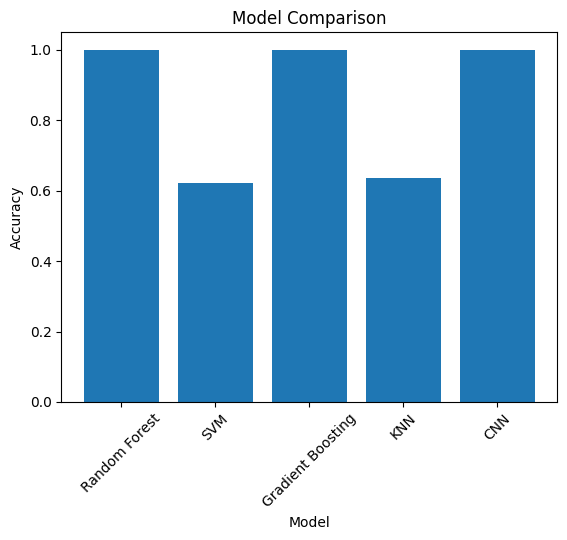

In [ ]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()


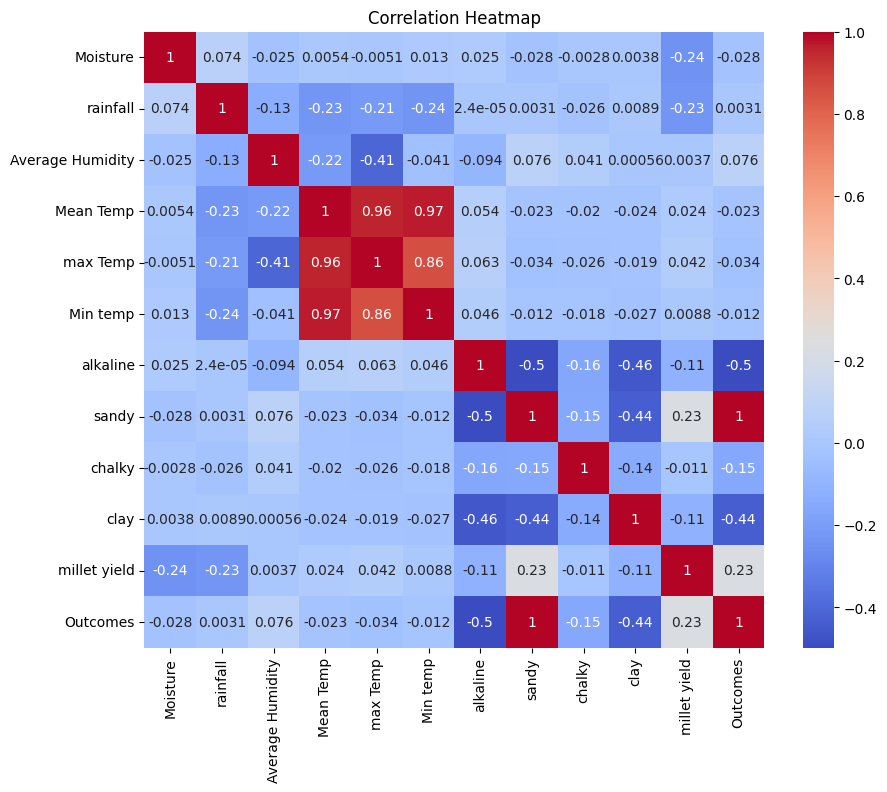

In [ ]:
#correlation heat map
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data_csv.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


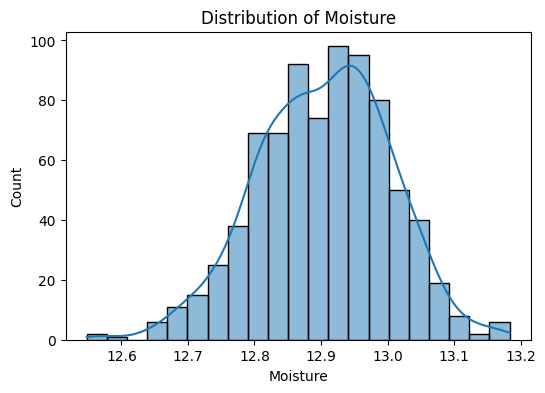

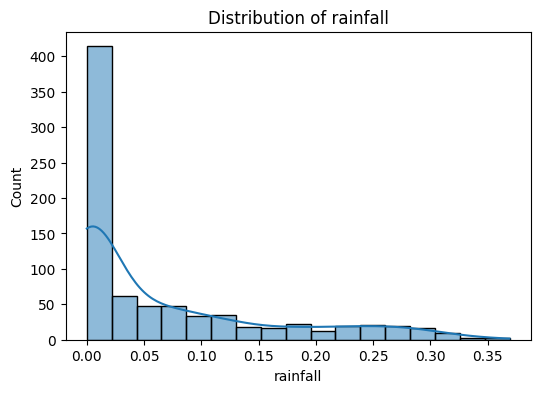

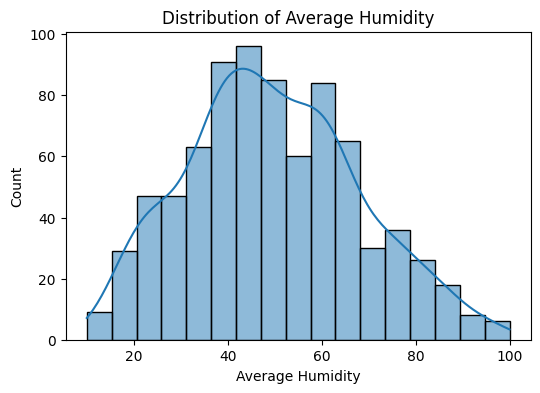

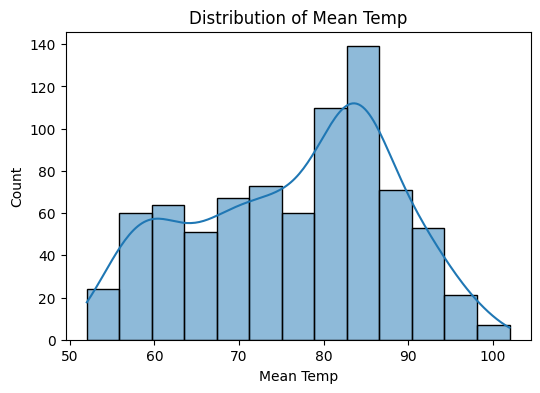

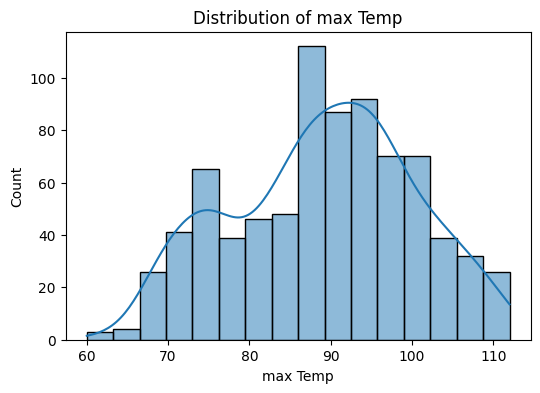

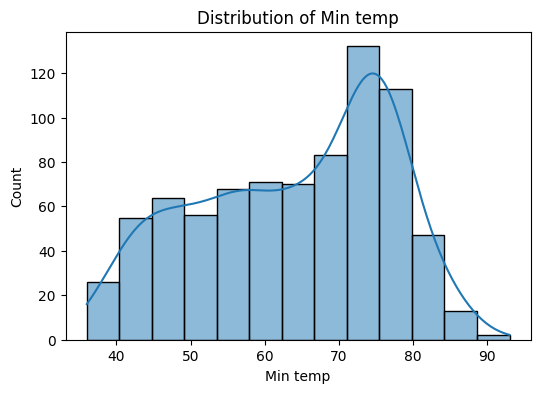

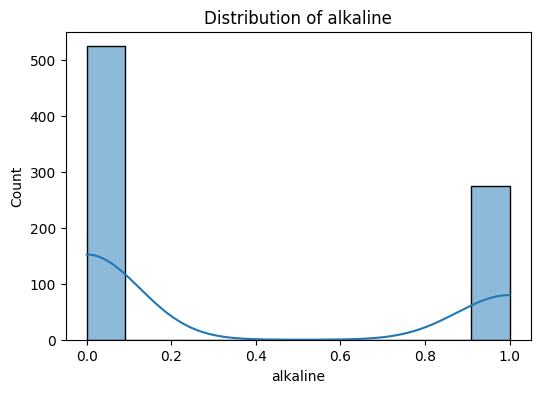

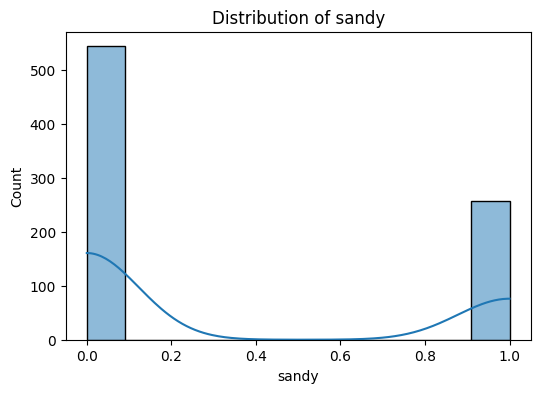

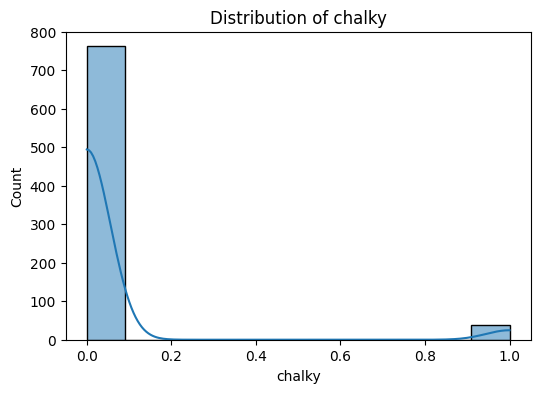

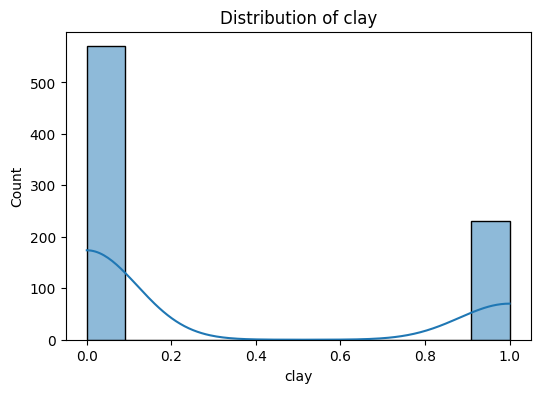

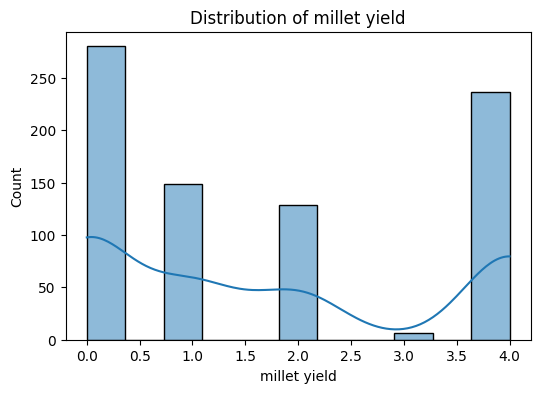

In [ ]:
#Feature Distributions
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_csv[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


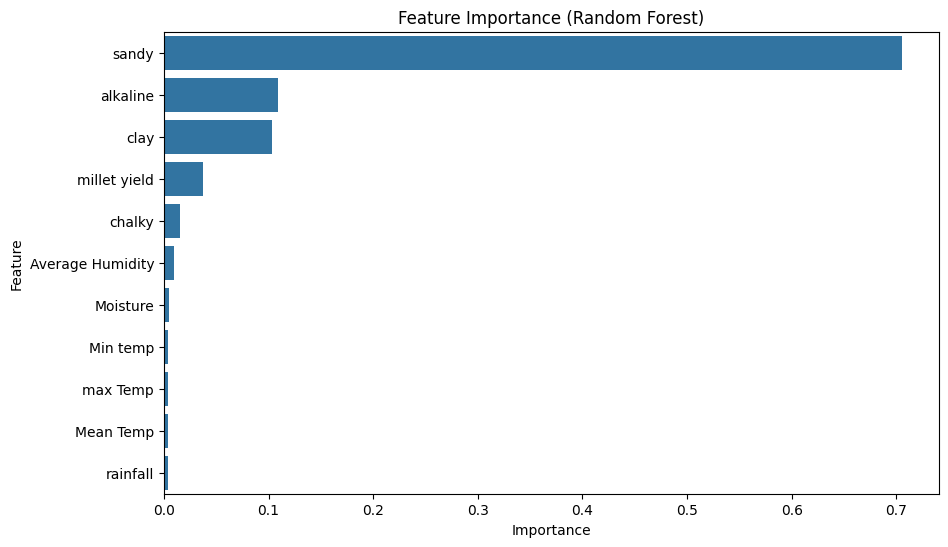

In [ ]:
# Feature Importance for Random Forest
import pandas as pd
importance = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()



In [ ]:
#Randomized Search for Random Forest
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=3, random_state=42)
rf_random.fit(X_train, y_train)
print("Best Parameters:", rf_random.best_params_)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 30}


In [ ]:
#Grid Search for SVM
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01,

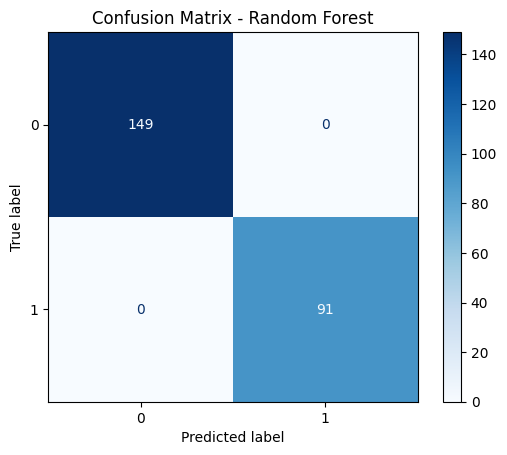

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
#ADD CROSS-VALIDATION
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores (Random Forest):", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores (Random Forest): [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [ ]:
#Ensemble Models
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('rf', rf), ('svm', svm), ('gbm', gbm)
], voting='hard')
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)

print("Ensemble Model Accuracy:", accuracy_score(y_test, ensemble_pred))


Ensemble Model Accuracy: 1.0


In [ ]:
!pip install plotly


In [ ]:
# Interactive Bar Chart
import plotly.express as px

results_df = pd.DataFrame({'Model': list(results.keys()), 'Accuracy': list(results.values())})
fig = px.bar(results_df, x='Model', y='Accuracy', color='Accuracy', title='Model Performance')
fig.show()


In [ ]:
!pip install shap


In [ ]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
loaded_model = joblib.load('random_forest_model.pkl')
print("Loaded Model Accuracy:", loaded_model.score(X_test, y_test))


Loaded Model Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



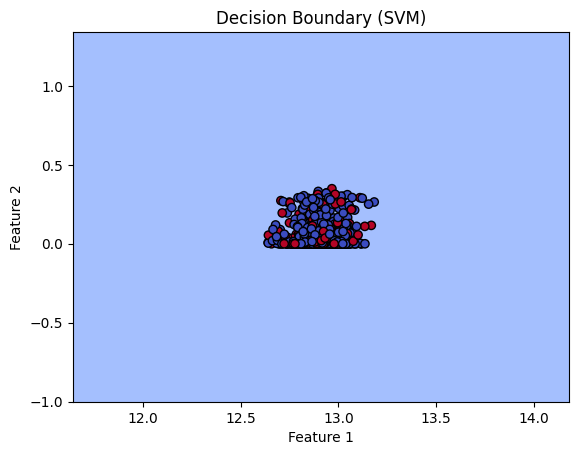

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select two features for visualization
X_train_2D = X_train.iloc[:, :2]  # Select first two columns
X_test_2D = X_test.iloc[:, :2]

# Train a simple SVM classifier
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_2D, y_train)

# Create a mesh grid
x_min, x_max = X_train_2D.iloc[:, 0].min() - 1, X_train_2D.iloc[:, 0].max() + 1
y_min, y_max = X_train_2D.iloc[:, 1].min() - 1, X_train_2D.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Plot decision boundary
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2D.iloc[:, 0], X_train_2D.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title('Decision Boundary (SVM)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
y_prob = rf.predict_proba(X_test)  # Probabilities from Random Forest

plt.figure(figsize=(10, 6))
plt.hist(y_prob[:, 1], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prediction Probabilities (Class 1)')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!pip install xgboost



In [ ]:
# Libraries for data handling and visualization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Library for XGBoost
from xgboost import XGBClassifier

In [ ]:
# Upload and load the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset (replace with your chosen dataset file)
data = pd.read_csv('Crop_recommendation.csv')  # Example: replace with your file name
print(data.head())


Saving Crop_recommendation.csv to Crop_recommendation.csv
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
# Upload and load the Excel file
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_excel('data (1).xlsx')  # Replace with your file name
print(data.head())


Saving data (1).xlsx to data (1).xlsx
    Moisture  rainfall  Average Humidity  Mean Temp  max Temp  Min temp  \
0  12.801685  0.012360                57         62        71        52   
1  12.851654  0.004172                57         58        73        43   
2  12.776773  0.000000                56         58        69        46   
3  12.942001  0.031747                62         56        70        43   
4  12.984652  0.000000                65         56        70        42   

   alkaline  sandy  chalky  clay  millet yield  Outcomes  
0         0      1       0     0             2         1  
1         0      1       0     0             0         1  
2         0      0       1     0             4         0  
3         0      1       0     0             0         1  
4         0      0       0     1             1         0  


In [ ]:
print(data.columns)


Index(['Moisture', 'rainfall', 'Average Humidity', 'Mean Temp', 'max Temp',
       'Min temp', 'alkaline', 'sandy', 'chalky', 'clay', 'millet yield',
       'Outcomes'],
      dtype='object')
